In [ ]:
from google.colab import files
uploaded = files.upload()

Saving [assignment]_Polynomial_Regression.ipynb to [assignment]_Polynomial_Regression.ipynb


In [ ]:
ls

'[assignment]_Polynomial_Regression.ipynb'   sample_data/
 polynomial_regression.pickle


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving polynomial_regression.pickle to polynomial_regression.pickle


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open('./polynomial_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

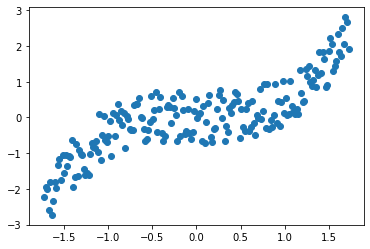

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

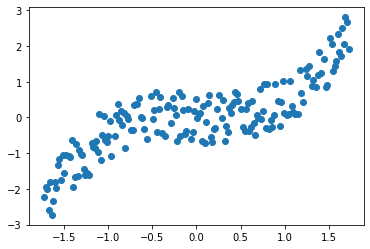

In [ ]:
plt.scatter(X_train, y_train)
plt.show()

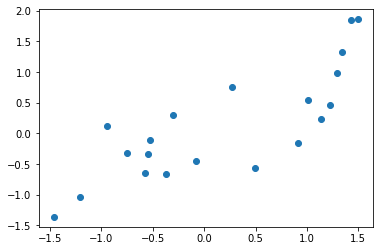

In [ ]:
plt.scatter(X_test, y_test)
plt.show()

In [ ]:
def gd_numpy(X,y,epochs,lr):
  
  w_list,b_list,loss_list = [],[],[]
  w=0
  b=0

  for i in range(epochs) :
    loss = np.mean((y-w*X+b)**2)
    dw = -2*np.mean(X*(y-w*X+b))
    db = -2*np.mean((y-w*X+b))
   
    w=w-dw*lr
    b=b-db*lr

    w_list.append(w)
    b_list.append(b)
    loss_list.append(loss)

  print(w,'\n',b,'\n',loss)
  return w,b,w_list,b_list,loss_list

In [ ]:
epochs=1000
lr=1e-7

w,b,w_list,b_list,loss_list = gd_numpy(X_train,y_train,epochs,lr)

0.00016604356897460893 
 -3.0428420837408385e-06 
 1.025465119622458


In [ ]:
y_pred = w*X_train+b

train_loss = np.mean((y_train - y_pred)**2)
print( '%.4f' %train_loss)

1.0255


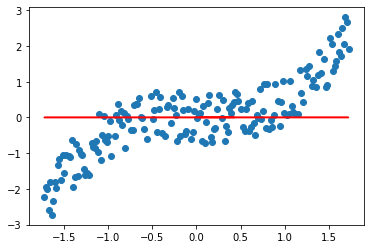

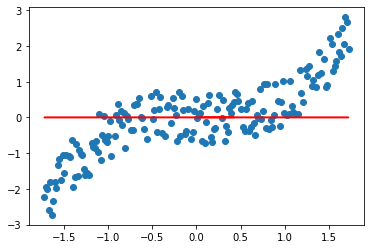

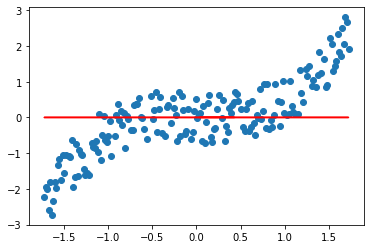

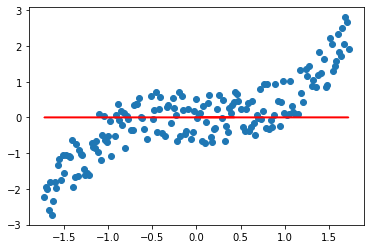

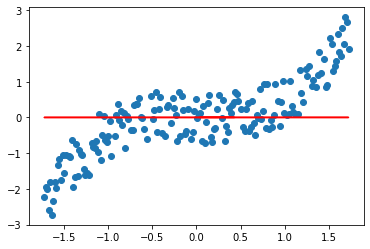

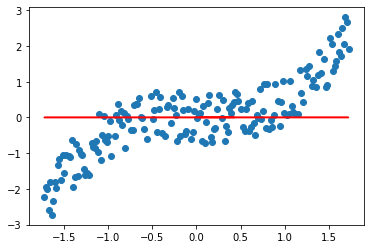

In [ ]:
nums=6
epochs_list = [round(epochs / (nums-1)*n) for n in range(nums)]

for i in range(len(epochs_list)) :
  plt.scatter(X_train, y_train)

  epoch = epochs_list[i] -1
  w = w_list[epoch]
  b = b_list[epoch]

  y_pred = w*X_train +b
  plt.plot(X_train, y_pred, color='red')
  plt.show()

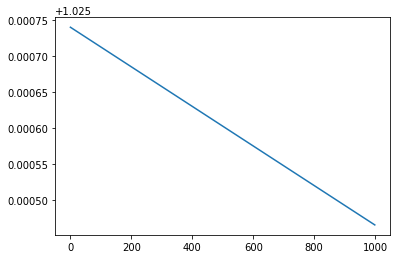

In [ ]:
plt.plot(loss_list)
plt.show()

In [ ]:
train_loss=np.mean((y_train-y_pred)**2)
print(train_loss)

1.0254646589280496


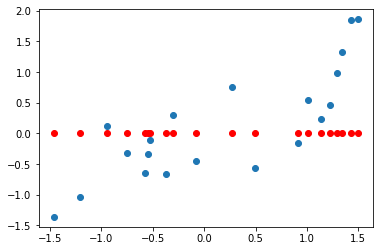

In [ ]:
plt.scatter(X_test,y_test)
y_pred=w*X_test+b

plt.scatter(X_test,y_pred,color='red')
plt.show()

In [ ]:
test_loss=np.mean((y_test-y_pred)**2)
print(test_loss)


0.7681078701827758


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
X_train

In [ ]:
def gd_sklearn(X_train, y_train, degree):
  poly_features = PolynomialFeatures(degree=degree)
  X_2d = X_train.reshape(X_train.shape[0],-1)
  X_poly = poly_features.fit_transform(X_2d)
  model = LinearRegression()

  X_1d = X_train.reshape(X_train.shape[0],-1)

  model.fit(X_poly.reshape(X_train.shape[0],-1), y_train)
  w= model.coef_
  b= model.intercept_ 

  print(w,'\n',b)
  return model


In [ ]:
def gd_sklearn2(X_train, y_train, degree):
  poly_features = PolynomialFeatures(degree=degree)
  X_2d = X_train.reshape(X_train.shape[0],-1)
  X_poly = poly_features.fit_transform(X_2d)
  model = LinearRegression()

  X_1d = X_train.reshape(X_train.shape[0],-1)

  model.fit(X_poly.reshape(X_train.shape[0],-1), y_train)
  w= model.coef_
  b= model.intercept_ 

  print(w,'\n',b)
  return model, X_poly


In [ ]:
model,X_poly = gd_sklearn2(X_train,y_train,3)

[ 0.         -0.08545059 -0.01164786  0.49823692] 
 0.02050611961537066


In [ ]:
X_poly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
y_pred = model.predict(X_poly.reshape(X_train.shape[0],-1))

train_loss=np.mean((y_train-y_pred)**2)
print(train_loss)

0.1816434371933727


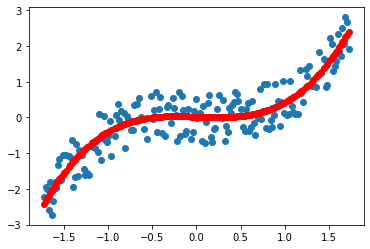

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred, color='red')
plt.show()

In [ ]:
model2 , X_poly= gd_sklearn2(X_test,y_test,3)
y_pred2 = model2.predict(X_plot.reshape(X_test.shape[0],-1))

train_loss=np.mean((y_test-y_pred2)**2)
print(train_loss)

[ 0.         -0.23096709  0.17095631  0.60506937] 
 -0.262623794761344


TypeError: ignored

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred, color='red')
plt.show()